In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
import math
import pdb

In [18]:
def hough_transform(img_bin, theta_res=1, rho_res=1):
  nR,nC = img_bin.shape
  theta = np.linspace(-90.0, 0.0, np.ceil(90.0/theta_res) + 1.0)
  theta = np.concatenate((theta, -theta[len(theta)-2::-1]))

  D = np.sqrt((nR - 1)**2 + (nC - 1)**2)
  q = np.ceil(D/rho_res)
  nrho = 2*q + 1
  rho = np.linspace(-q*rho_res, q*rho_res, nrho)
  H = np.zeros((len(rho), len(theta)))
  for rowIdx in range(nR):
    for colIdx in range(nC):
      if img_bin[rowIdx, colIdx]:
        for thIdx in range(len(theta)):
          rhoVal = colIdx*np.cos(theta[thIdx]*np.pi/180.0) + \
              rowIdx*np.sin(theta[thIdx]*np.pi/180)
          rhoIdx = np.nonzero(np.abs(rho-rhoVal) == np.min(np.abs(rho-rhoVal)))[0]
          H[rhoIdx[0], thIdx] += 1
  return rho, theta, H

In [19]:
def top_n_rho_theta_pairs(ht_acc_matrix, n, rhos, thetas):

  flat = list(set(np.hstack(ht_acc_matrix)))
  flat_sorted = sorted(flat, key = lambda n: -n)
  coords_sorted = [(np.argwhere(ht_acc_matrix == acc_value)) for acc_value in flat_sorted[0:n]]
  rho_theta = []
  x_y = []
  for coords_for_val_idx in range(0, len(coords_sorted), 1):
    coords_for_val = coords_sorted[coords_for_val_idx]
    for i in range(0, len(coords_for_val), 1):
      n,m = coords_for_val[i]
      rho = rhos[n]
      theta = thetas[m]
      rho_theta.append([rho, theta])
      x_y.append([m, n]) 
  return [rho_theta[0:n], x_y]

In [20]:
def valid_point(pt, ymax, xmax):
  x, y = pt
  if x <= xmax and x >= 0 and y <= ymax and y >= 0:
    return True
  else:
    return False


In [21]:
def round_tup(tup):
  x,y = [int(round(num)) for num in tup]
  return (x,y)

In [22]:
def draw_rho_theta_pairs(target_im, pairs):
  im_y_max, im_x_max, channels = np.shape(target_im)
  for i in range(0, len(pairs), 1):
    point = pairs[i]
    rho = point[0]
    theta = point[1] * np.pi / 180 
    m = -np.cos(theta) / np.sin(theta)
    b = rho / np.sin(theta)
    left = (0, b)
    right = (im_x_max, im_x_max * m + b)
    top = (-b / m, 0)
    bottom = ((im_y_max - b) / m, im_y_max)

    pts = [pt for pt in [left, right, top, bottom] if valid_point(pt, im_y_max, im_x_max)]
    if len(pts) == 2:
      cv2.line(target_im, round_tup(pts[0]), round_tup(pts[1]), (0,0,255), 1)


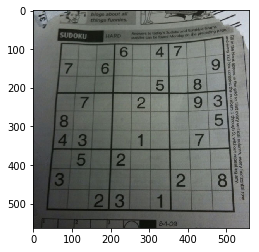

In [54]:
img_orig = cv2.imread('sudoku.jpg')
img = img_orig[:,:,::-1]
plt.imshow(img)

In [50]:
bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(bw, threshold1 = 0, threshold2 = 50, apertureSize = 3)

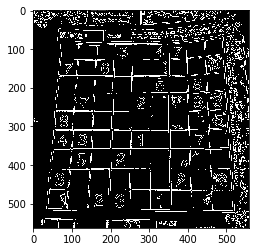

In [55]:
plt.imshow(edges,cmap = 'gray')
plt.savefig('edge.png')

/home/gurpreet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurpreet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


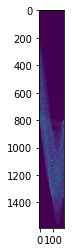

In [56]:
rhos, thetas, H = hough_transform(edges)
plt.imshow(H)

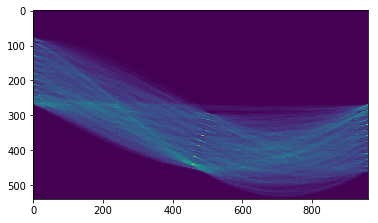

In [57]:
hs=cv2.resize(H,(960,540))
plt.imshow(hs)
plt.savefig('Accumulator.png')

In [58]:
rho_theta_pairs, x_y_pairs = top_n_rho_theta_pairs(H, 25, rhos, thetas)
im_w_lines = img.copy()
draw_rho_theta_pairs(im_w_lines, rho_theta_pairs)

/home/gurpreet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/home/gurpreet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/gurpreet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/gurpreet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/gurpreet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


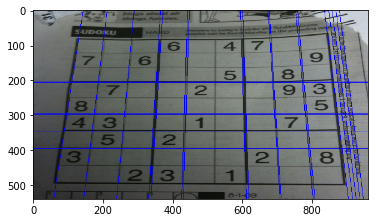

In [59]:
hs=cv2.resize(im_w_lines,(960,540))
plt.imshow(hs)
plt.savefig('Output.png')